In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('slr06.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
df.head(5)

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [4]:
# First let's calculate mean
# mean(x) = sum(x) / count(x)

def mean(values):
        return sum(values)/float(len(values))

In [5]:
# Calculating variance
# variance = sum( (x - mean(x))^2 )

def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [6]:
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [7]:
x = np.array(df.X)
y = np.array(df.Y)

In [8]:
# This is a test data for x and y values
# dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
# x = [row[0] for row in dataset]
# y = [row[1] for row in dataset]
# x = np.array(x)
# y = np.array(y)

In [9]:
x_mean = x.mean()
y_mean = y.mean()
x

array([108,  19,  13, 124,  40,  57,  23,  14,  45,  10,   5,  48,  11,
        23,   7,   2,  24,   6,   3,  23,   6,   9,   9,   3,  29,   7,
         4,  20,   7,   4,   0,  25,   6,   5,  22,  11,  61,  12,   4,
        16,  13,  60,  41,  37,  55,  41,  11,  27,   8,   3,  17,  13,
        13,  15,   8,  29,  30,  24,   9,  31,  14,  53,  26])

In [10]:
var_x = variance(x.tolist(), x_mean)
var_y = variance(y.tolist(), y_mean)

In [11]:
var_x

33809.42857142858

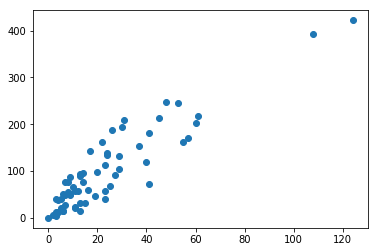

In [12]:
plt.scatter(x,y)
# This is the plot of the dataset
plt.show()

#### Calculating the covariance 
#### The covariance of two groups of numbers describes how those numbers change together.

#### Covariance is a generalization of correlation. Correlation describes the relationship between two groups of numbers, whereas covariance can describe the relationship between two or more groups of numbers.

#### Additionally, covariance can be normalized to produce a correlation value.

In [ ]:
# covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))

In [13]:
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

In [14]:
cov = covariance(x.tolist(), x_mean, y.tolist(), y_mean)

In [15]:
cov

115419.42380952384

In [188]:
### Estimating the coefficients
# We must estimate the values for two coefficients in simple linear regression.
# assume: y = b0 + b1 * x , is the st. line equation

In [189]:
# The first is B1 which can be estimated as:
# B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )
# which is: B1 = covariance(x, y) / variance(x)

In [190]:
# and B0 = mean(y) - B1 * mean(x)

In [16]:
def coefficients(x, x_mean, y, y_mean):
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return  [b0, b1]

In [17]:
coef = coefficients(x, x_mean, y, y_mean)

In [18]:
coef

[19.994485759114809, 3.4138235600663664]

### Making Predictions

In [19]:
# The simple linear regression model is a line defined by coefficients estimated from training data.
# Once the coefficients are estimated, we can use them to make predictions.
# The equation to make predictions with a simple linear regression model is as follows:
# y = b0 + b1 * x

##### Below is a function named simple_linear_regression() that implements the prediction equation to make predictions on a test dataset. It also ties together the estimation of the coefficients on training data from the steps above.

In [27]:
def simple_linear_regression(train, test):
    predictions = list()
#     b0, b1 = coefficients(train) # change required here for train and test.
    b0, b1 = coefficients(x, x_mean, y, y_mean)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

In [28]:
# As part of this example, we will also add in a function to manage the evaluation of the predictions called 
# evaluate_algorithm() and another function to estimate the Root Mean Squared Error of the predictions called 
# rmse_metric().

In [29]:
from math import sqrt

In [30]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [31]:
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse

In [34]:
# # dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
dataset = df.as_matrix()
dataset = dataset.tolist()
rmse = evaluate_algorithm(dataset, simple_linear_regression)

[388.68743024628236, 84.857133400375773, 64.374192039977572, 443.30860720734427, 156.54742816176946, 214.5824286828977, 98.512427640641235, 67.788015600043934, 173.6165459621013, 54.132721359778472, 37.063603559446641, 183.85801664230041, 57.546544919844841, 98.512427640641235, 43.891250679579372, 26.82213287924754, 101.92625120070761, 40.47742711951301, 30.23595643931391, 98.512427640641235, 40.47742711951301, 50.71889779971211, 50.71889779971211, 30.23595643931391, 118.99536900103944, 43.891250679579372, 33.649779999380272, 88.270956960442135, 43.891250679579372, 33.649779999380272, 19.994485759114809, 105.34007476077397, 40.47742711951301, 37.063603559446641, 95.098604080574873, 57.546544919844841, 228.23772292316318, 60.96036847991121, 33.649779999380272, 74.615662720176672, 64.374192039977572, 224.82389936309679, 159.96125172183582, 146.30595748157037, 207.75478156276498, 159.96125172183582, 57.546544919844841, 112.1677218809067, 47.305074239645741, 30.23595643931391, 78.029486280

35.365829968791466

In [35]:
# Printing out the root mean square error
rmse

35.365829968791466

### Predict the insurance